In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy import stats

# 데이터 준비

In [2]:
# csv 파일 불러오기
df = pd.read_csv("./data/auto-mpg.csv", header = None)
df.columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "name"]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [4]:
df.shape

(398, 9)

In [5]:
df.info

<bound method DataFrame.info of       mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model_year  origin                       name  
0            70       1  chevrolet chevelle malibu  
1        

In [6]:
# horsepower 전처리(타입 변환)
df["horsepower"].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [7]:
df["horsepower"] = df["horsepower"].replace("?", np.nan)

In [8]:
df = df.dropna(subset = ["horsepower"], axis = 0)

In [9]:
df["horsepower"] = df["horsepower"].astype("float64")

C:\Users\ITSC\AppData\Local\Temp\ipykernel_9312\3772759328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["horsepower"] = df["horsepower"].astype("float64")


In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


# 변수 선택

In [12]:
df[["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]].corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000


In [13]:
# 분석에 활용할 열 선택(연비, 실린더, 출력, 중량)
ndf = df[["mpg", "cylinders", "horsepower", "weight"]]

In [14]:
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


In [15]:
ndf.describe()

,mpg,cylinders,horsepower,weight
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184
std,7.805007,1.705783,38.491160,849.402560
min,9.000000,3.000000,46.000000,1613.000000
25%,17.000000,4.000000,75.000000,2225.250000
50%,22.750000,4.000000,93.500000,2803.500000
75%,29.000000,8.000000,126.000000,3614.750000
max,46.600000,8.000000,230.000000,5140.000000


# 데이터셋 분할

In [16]:
x = ndf.drop("mpg", axis = 1) # 독립변수 x1, x2, x3
y = ndf["mpg"] # 종속변수 y

In [17]:
# train data와 test data 분할(75 : 25)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 8)

In [18]:
print(len(x_train), len(x_test))

294 98


# 선형회귀 모델링

In [19]:
# 선형회귀 모델 객체 생성
lr = LinearRegression()

In [20]:
# train data로 모델 학습
lr.fit(x_train, y_train)

LinearRegression()

# 모델 해석 및 평가

In [21]:
# 결정계수(R제곱)
r_square = lr.score(x_test, y_test)
r_square

0.6637905334920755

In [22]:
# 회귀식의 기울기
lr.coef_

array([-0.55969279, -0.03151424, -0.00554943])

In [23]:
# 회귀식의 y절편
lr.intercept_

46.272067002228

In [24]:
# 모형에 x_test를 입력하여 예측한 값을 실제 값과 비교
y_pred = lr.predict(x_test)

In [26]:
mse = mean_squared_error(y_test, y_pred)
mse

21.265040113517063

In [27]:
rmse = mean_squared_error(y_test, y_pred, squared = False)
rmse

4.6114032694524845

In [28]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.4776457697862253

In [31]:
pd.DataFrame({"ans" : y_test, "pred" : y_pred.flatten()})

,ans,pred
299,27.2,24.093088
177,23.0,26.089266
8,14.0,10.147572
165,20.0,20.453229
256,20.5,20.727925
...,...,...
209,19.0,23.113391
244,43.1,31.504984
93,14.0,13.554434
205,28.0,29.710696


## 모델 평가 시각화

### 예측값과 정답값 비교 산점도

- 모델의 예측이 실제값과 얼마나 밀접하게 일치하는지 평가
- 완벽한 모델은 모든 점이 대각선 위에 놓여 있는 것

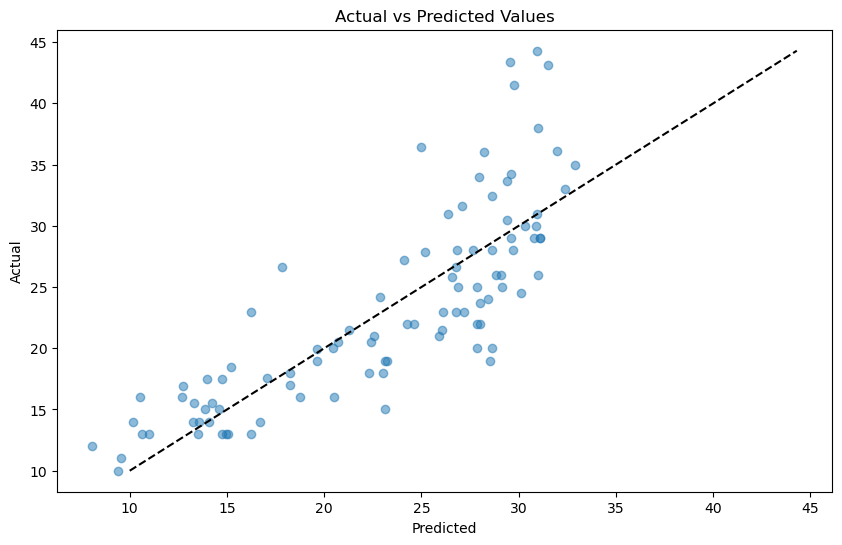

In [33]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, y_test, alpha = 0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted Values")
plt.show()

### 잔차도

- 잔차의 패턴을 식별하는데 도움
- 이상적으로는 잔차가 0 주위에 무작위로 흩어져 있어야 하며, 이는 모델의 오류가 무작위임을 나타냄

In [34]:
# 잔차
residuals = y_test - y_pred

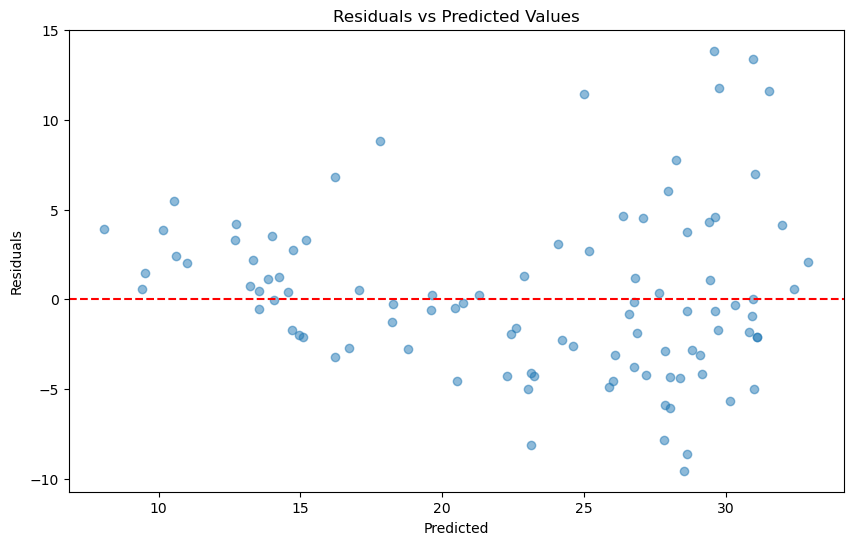

In [35]:
plt.figure(figsize = (10, 6))

plt.scatter(y_pred, residuals, alpha = 0.5)
plt.axhline(y = 0, color = "r", linestyle = "--")

plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

### QQ plot

- 잔차 분포를 정규 분포와 비교
- 잘 맞는 모델에서는 점들이 대략 대각선을 따라 위치해야 함

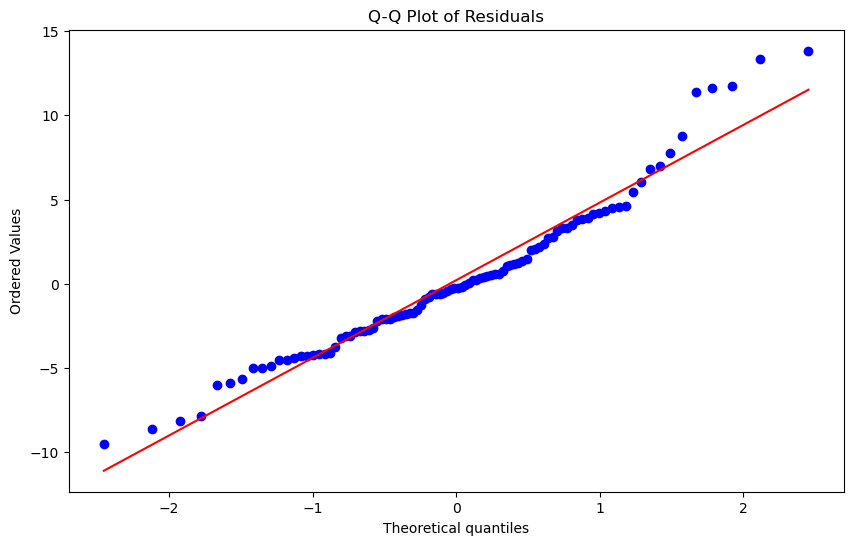

In [37]:
plt.figure(figsize = (10, 6))

stats.probplot(residuals.values.flatten(), dist = "norm", plot = plt)

plt.title("Q-Q Plot of Residuals")
plt.show()

### 잔차 히스토그램

- 잔차 분포에 대한 또 다른 시각을 제공
- 잘 맞는 모델의 경우 0을 중심으로 하는 정규 분포를 볼 수 있음

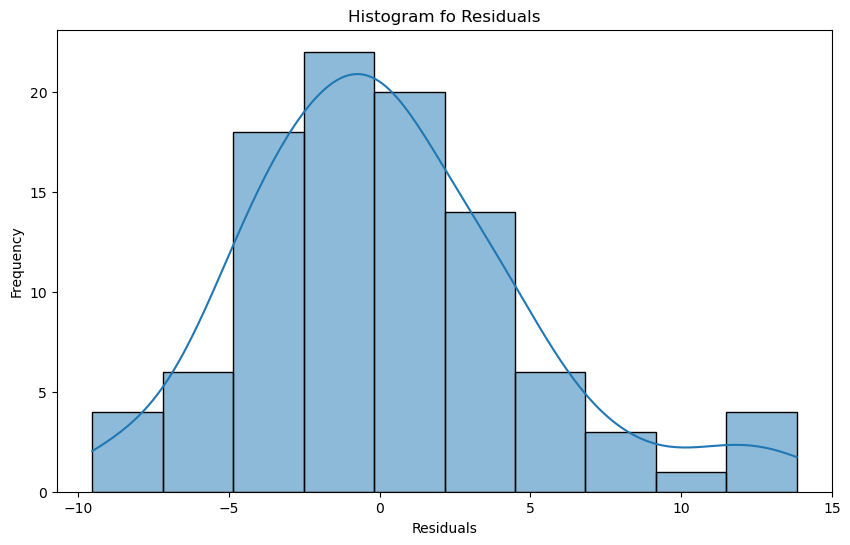

In [38]:
plt.figure(figsize = (10, 6))

sns.histplot(residuals, kde = True)

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram fo Residuals")
plt.show()